# Introduction
Welcome to this Exploratory Data Analysis (EDA) notebook. In this notebook, we will dive into the dataset to uncover initial insights, identify patterns, and understand the underlying structure of the data. EDA is a crucial step in the data science workflow as it helps in formulating hypotheses, detecting anomalies, and guiding further analysis.

## Objectives
- Load and clean the dataset
- Perform descriptive statistics
- Visualize data distributions and relationships
- Identify and handle missing values
- Highlight key findings and potential areas for further investigation

#### Imports and config

In [22]:
import json
import pandas as pd
import random

In [7]:
with open("../../data/train.json") as f:
    data = json.load(f)

### Data Understanding

In [30]:
len(data)

3037

In [31]:
data[0]['pre_text']

['26 | 2009 annual report in fiscal 2008 , revenues in the credit union systems and services business segment increased 14% ( 14 % ) from fiscal 2007 .',
 'all revenue components within the segment experienced growth during fiscal 2008 .',
 'license revenue generated the largest dollar growth in revenue as episys ae , our flagship core processing system aimed at larger credit unions , experienced strong sales throughout the year .',
 'support and service revenue , which is the largest component of total revenues for the credit union segment , experienced 34 percent growth in eft support and 10 percent growth in in-house support .',
 'gross profit in this business segment increased $ 9344 in fiscal 2008 compared to fiscal 2007 , due primarily to the increase in license revenue , which carries the highest margins .',
 'liquidity and capital resources we have historically generated positive cash flow from operations and have generally used funds generated from operations and short-term bo

In [32]:
data[0]['table']

[['2008',
  'year ended june 30 2009 2008',
  'year ended june 30 2009 2008',
  'year ended june 30 2009'],
 ['net income', '$ 103102', '$ 104222', '$ 104681'],
 ['non-cash expenses', '74397', '70420', '56348'],
 ['change in receivables', '21214', '-2913 ( 2913 )', '-28853 ( 28853 )'],
 ['change in deferred revenue', '21943', '5100', '24576'],
 ['change in other assets and liabilities',
  '-14068 ( 14068 )',
  '4172',
  '17495'],
 ['net cash from operating activities', '$ 206588', '$ 181001', '$ 174247']]

In [33]:
data[0]['post_text']

['year ended june 30 , cash provided by operations increased $ 25587 to $ 206588 for the fiscal year ended june 30 , 2009 as compared to $ 181001 for the fiscal year ended june 30 , 2008 .',
 'this increase is primarily attributable to a decrease in receivables compared to the same period a year ago of $ 21214 .',
 'this decrease is largely the result of fiscal 2010 annual software maintenance billings being provided to customers earlier than in the prior year , which allowed more cash to be collected before the end of the fiscal year than in previous years .',
 'further , we collected more cash overall related to revenues that will be recognized in subsequent periods in the current year than in fiscal 2008 .',
 'cash used in investing activities for the fiscal year ended june 2009 was $ 59227 and includes $ 3027 in contingent consideration paid on prior years 2019 acquisitions .',
 'cash used in investing activities for the fiscal year ended june 2008 was $ 102148 and includes payment

In [34]:
data[0]['id']

'Single_JKHY/2009/page_28.pdf-3'

In [35]:
data[0]['annotation']

{'amt_table': "<table class='wikitable'><tr><td>1</td><td>2008</td><td>year ended june 30 2009 2008</td><td>year ended june 30 2009 2008</td><td>year ended june 30 2009</td></tr><tr><td>2</td><td>net income</td><td>$ 103102</td><td>$ 104222</td><td>$ 104681</td></tr><tr><td>3</td><td>non-cash expenses</td><td>74397</td><td>70420</td><td>56348</td></tr><tr><td>4</td><td>change in receivables</td><td>21214</td><td>-2913 ( 2913 )</td><td>-28853 ( 28853 )</td></tr><tr><td>5</td><td>change in deferred revenue</td><td>21943</td><td>5100</td><td>24576</td></tr><tr><td>6</td><td>change in other assets and liabilities</td><td>-14068 ( 14068 )</td><td>4172</td><td>17495</td></tr><tr><td>7</td><td>net cash from operating activities</td><td>$ 206588</td><td>$ 181001</td><td>$ 174247</td></tr></table>",
 'amt_pre_text': '26 | 2009 annual report in fiscal 2008 , revenues in the credit union systems and services business segment increased 14% ( 14 % ) from fiscal 2007 . all revenue components within 

In [36]:
data[0]['qa']

{'question': 'what was the percentage change in the net cash from operating activities from 2008 to 2009',
 'answer': '14.1%',
 'explanation': '',
 'ann_table_rows': [6],
 'ann_text_rows': [],
 'steps': [{'op': 'minus2-1',
   'arg1': '206588',
   'arg2': '181001',
   'res': '25587'},
  {'op': 'divide2-2', 'arg1': '#0', 'arg2': '181001', 'res': '14.1%'}],
 'program': 'subtract(206588, 181001), divide(#0, 181001)',
 'gold_inds': {'table_6': '2008 the net cash from operating activities of year ended june 30 2009 2008 is $ 206588 ; the net cash from operating activities of year ended june 30 2009 2008 is $ 181001 ; the net cash from operating activities of year ended june 30 2009 is $ 174247 ;'},
 'exe_ans': 0.14136,
 'program_re': 'divide(subtract(206588, 181001), 181001)'}

### Data Joining 

Joinin 'pre_text', 'table' and 'post_text' for simplicity.

Tables are also written in markdown format for easier handling by the LLMs

In [15]:
def join_text(entry: dict) -> str:
    page = ""

    page += ('\n'.join(map(str, entry['pre_text'])) + '\n\n')
    for table in entry['table']:
        page += ('| ' +' | '.join(map(str, table)) + ' |\n')
    page += ('\n' + '\n'.join(map(str, entry['post_text'])))

    return page

print(join_text(data[0]))

26 | 2009 annual report in fiscal 2008 , revenues in the credit union systems and services business segment increased 14% ( 14 % ) from fiscal 2007 .
all revenue components within the segment experienced growth during fiscal 2008 .
license revenue generated the largest dollar growth in revenue as episys ae , our flagship core processing system aimed at larger credit unions , experienced strong sales throughout the year .
support and service revenue , which is the largest component of total revenues for the credit union segment , experienced 34 percent growth in eft support and 10 percent growth in in-house support .
gross profit in this business segment increased $ 9344 in fiscal 2008 compared to fiscal 2007 , due primarily to the increase in license revenue , which carries the highest margins .
liquidity and capital resources we have historically generated positive cash flow from operations and have generally used funds generated from operations and short-term borrowings on our revolv

### Study token limitations on the corpus

In [16]:
import tiktoken

# Initialize the tokenizer
tokenizer = tiktoken.get_encoding("cl100k_base")

In [17]:
for entry in data:
    page = join_text(entry)
    entry['join_text'] = page
    entry['input_tokens'] = len(tokenizer.encode(page))

In [18]:
import numpy as np
import matplotlib.pyplot as plt

values = np.array([entry["input_tokens"] for entry in data])
labels = [entry["id"] for entry in data]

In [19]:
values

array([1074,  858, 1007, ...,  703,  674, 1015])

In [20]:
max(values)

np.int64(2832)

#### Shouldn't be a problem

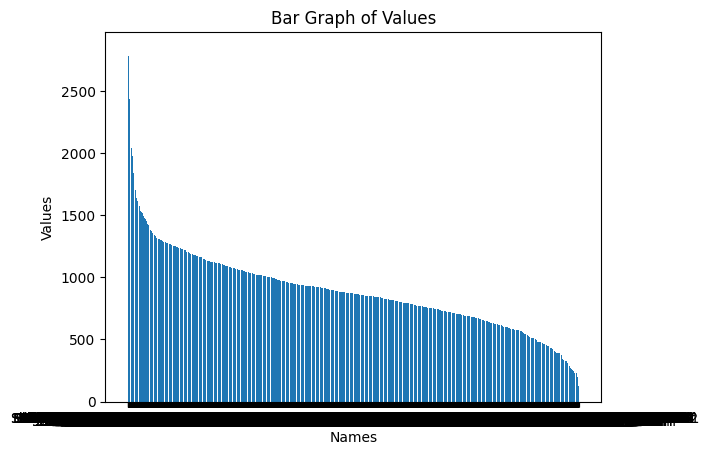

In [21]:
# Sort the values and labels in descending order
sorted_indices = np.argsort(values)[::-1]
sorted_values = values[sorted_indices]
sorted_labels = np.array(labels)[sorted_indices]

# Create a bar graph
plt.bar(sorted_labels, sorted_values)

# Add title and labels to the graph
plt.title("Bar Graph of Values")
plt.xlabel("Names")
plt.ylabel("Values")

# Show the graph
plt.show()

### df exploration

In [23]:
df = pd.DataFrame(random.sample(data, 100))

In [25]:
df.head()

,pre_text,post_text,filename,table_ori,table,qa,id,annotation,join_text,input_tokens,qa_0,qa_1
0,[entergy corporation and subsidiaries notes to...,[.],ETR/2016/page_175.pdf,"[[, Amount (In Thousands)], [2017, $17,188], [...","[[, amount ( in thousands )], [2017, $ 17188],...",{'question': 'what are the implicit interest c...,Single_ETR/2016/page_175.pdf-3,{'amt_table': '<table class='wikitable'><tr><t...,entergy corporation and subsidiaries notes to ...,649,NaN,NaN
1,[58 2018 ppg annual report and 10-k the crown ...,[( a ) the net deferred income tax liability i...,PPG/2018/page_60.pdf,"[[Current assets, $38], [Property, plant, and ...","[[current assets, $ 38], [property plant and e...","{'question': 'for metokote , what percentage o...",Single_PPG/2018/page_60.pdf-2,{'amt_table': '<table class='wikitable'><tr><t...,58 2018 ppg annual report and 10-k the crown g...,1056,NaN,NaN
2,"[in 2017 , the company granted 440076 shares o...","[the total fair value of restricted stock , re...",CME/2017/page_99.pdf,"[[, Number of Shares, WeightedAverageGrant Dat...","[[, number of shares, weightedaveragegrant dat...","{'question': 'in millions , how much compensat...",Single_CME/2017/page_99.pdf-2,{'amt_table': '<table class='wikitable'><tr><t...,"in 2017 , the company granted 440076 shares of...",701,NaN,NaN
3,[have access to liquidity by issuing bonds to ...,[operating activities lower net income in 2009...,UNP/2009/page_38.pdf,"[[<i>Millions of Dollars</i>, <i>2009</i>, 200...","[[millions of dollars, 2009, 2008, 2007], [cas...",{'question': 'what was the percentage change i...,Single_UNP/2009/page_38.pdf-4,{'amt_table': '<table class='wikitable'><tr><t...,have access to liquidity by issuing bonds to p...,500,NaN,NaN
4,"[entergy new orleans , inc ., and subsidiaries...",[see note 4 to the financial statements for a ...,ETR/2016/page_403.pdf,"[[2016, 2015, 2014, 2013], [(In Thousands)], [...","[[2016, 2015, 2014, 2013], [( in thousands ), ...",{'question': 'what is the maximum target autho...,Single_ETR/2016/page_403.pdf-2,{'amt_table': '<table class='wikitable'><tr><t...,"entergy new orleans , inc .\nand subsidiaries ...",853,NaN,NaN


# Saving a version of the data with the context joined

In [45]:
with open("../../data/train_extended.json", "w") as json_file:
    json.dump(data, json_file, indent=4)
    